# Lab1: Ordinary Differential Equations (Solution)

University of California Berkeley

ME C231A, EE C220B, Experiential Advanced Control I

***

*This* lab focuses on the solution of ordinary differential equations (ode). 
You will learn

1.   functions and anonymous functions in python
2.   the use of the function $\texttt{scipy.integrate.solve_ivp}$ to solve odes. For more information, look at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html .(This function numerically integrates a system of ordinary differential equations.)
3.  the use of the python library for symbolic mathematics SymPy to perform analytical differentiation. 

***

# Function Representation

In [11]:
### Function representation example
def out_sum(x):
    return x + 3

# Anonymous Function

In [13]:
### Anonymous function representation example 
out_sum_anonym = lambda x: x + 3

In [15]:
# Both of the above representations are equivalent.
# Evaluate both examples at x = 5 and compare their values:
out_sum(5) == out_sum_anonym(5)

True

***

# Solving Differential Equation
To solve the differential equation dy/dt = f(t,y) for a given initial value y(t0) = y0, we use the following function:

In [16]:
# scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, vectorized=False, args=None)

### Function inputs
# fun: the function which is the right-hand side of the differential equation which can be defined as function or anonymous function
# t_span: the interval of integration (t0,tf), the solver starts at the initial time (t0) and integrates until it reaches the final time (tf)
# y0: the initial value, it has arraylike shape (n,)
# methods: we use RK45, which is explicit Runge-Kutta methods of order 5(4)
# t_eval: the time at which the computed solution is stored
# vectorized: the function is implemented in a vectoried fashion or not, (default is false)
# args: additional arguments to pass to the user-defined function fun

### Function returns
# t: time points
# y: values of the solution at t
# sol: OdeSolution

***

# Exercise 1
Solve the differential equation: $\dot{x}(t) = e^{-x(t)}$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 20. 

Text(0,0.5,'x')

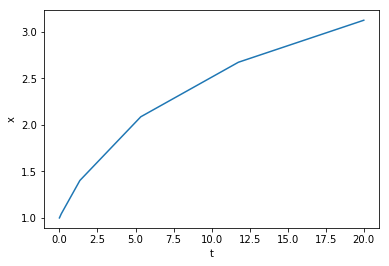

In [17]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def exp_ode(t, x):
    return np.exp(-x)

x0 = np.array([1])
t0 = 0
tf = 20

# Either function representation or anonymous function can be set as fun 
sol = solve_ivp(fun=exp_ode, t_span=[t0, tf], y0=x0, method='RK45') # function exp_ode is set as fun
# sol = solve_ivp(fun= lambda t,x: np.exp(-x), t_span=[t0, tf], y0=x0, method='RK45') # an anonymous function is set as fun

plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Exercise 2
Solve the differential equation: $\dot{x}(t) = -x(t)e^{t}$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 5. 

Text(0,0.5,'x')

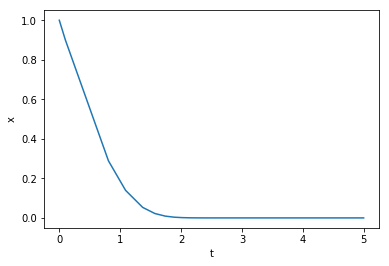

In [18]:
def x_exp_ode(t, x):
    return (-x)*(np.exp(t))

x0 = np.array([1])
t0 = 0
tf = 5
sol = solve_ivp(fun=x_exp_ode, t_span=[t0, tf], y0=x0, method='RK45')
sol.y[0]
sol.t
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Exercise 3
Solve the differential equation: $\dot{x}(t) = (-0.2+sin(t))x(t)$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 5. 

Text(0,0.5,'x')

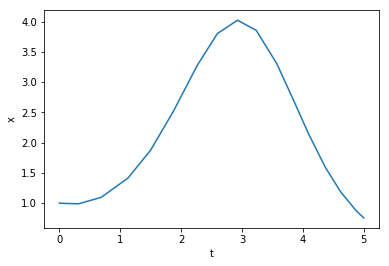

In [19]:
def sin_ode(t, x):
    return (-0.2+np.sin(t))*x

x0 = np.array([1])
t0 = 0
tf = 5
sol = solve_ivp(fun=sin_ode, t_span=[t0, tf], y0=x0, method='RK45', rtol=1e-6) # rtol is the relative tolerance. The low rtol values result in high precision solutions. 
sol.y[0]
sol.t
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Example 
The inverted pendulum system consists of an inverted pendulum mounted on a cart. The dynamics of the inverted pendulum are

\begin{align}
(I + ml^2) \ddot{\theta} + b \dot{\theta} - mgl \sin\theta = ml \cos \theta u.
\end{align}

where $u$ is the cart acceleration, $\theta$ is the pendulum angle and $m$, $l$, and $I$ are the pendulum mass, half-length, and moment of inertia respectively.

In non-linear state-space form the dynamics are
\begin{align}
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} =
\begin{bmatrix} x_2 \\ -a_0 \sin x_1 - a_1 x_2 \end{bmatrix} +
\begin{bmatrix}0 \\ b_0 u\cos x_1 \end{bmatrix}
\end{align}

where $x_1 = \theta$ and $x_2 = \dot{\theta}$, and $a_0 = -\tfrac{mgl}{I + ml^2}$, $a_1 = \tfrac{b}{I + ml^2}$, and  $b_0 = \tfrac{ml}{I + ml^2}$.  In this lab we will use the parameters: $a_0 = -2.5$, $a_1 = 0.05$, and $b_0 = 0.25$. The initial condition is [$\pi$/4,0] and the final time tf = 15 seconds. Solve the state-space ode. 

In [20]:
a0 = -2.5
a1 = 0.05
b0 = 0.25
tf = 15

x0 = np.array([np.pi/4, 0])

def dyn_ode(t, x, a0, a1, b0):
    theta, thetadot = x
    return [thetadot, - a0*np.sin(theta) - a1*thetadot + b0*np.cos(theta)]

sol = solve_ivp(fun=dyn_ode, t_span=[t0, tf], 
                y0=x0, method='RK45', vectorized=True, args=(a0, a1, b0), rtol=1e-7) # rtol is the relative tolerance. The low rtol values result in high precision solutions.

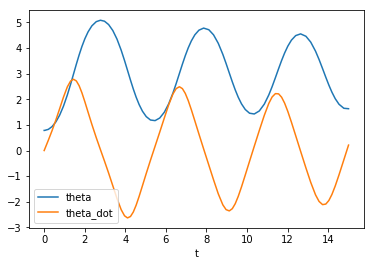

In [21]:
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.legend(['theta', 'theta_dot'])
plt.xlabel('t')
plt.show()

***

# Analytical Differentiation
*SymPy* is a python library for symbolic mathematics. 

In [22]:
import sympy as sym
x = sym.Symbol('x')  # declare symbolic variable

A = sym.Matrix(np.eye((4))*x)
print('A = ', A)

A_val = A.subs(x, 3)  # evaluate an expression at a point (evaluate A at x = 3)
print('evaluated_A = ', A_val)

A =  Matrix([[1.0*x, 0, 0, 0], [0, 1.0*x, 0, 0], [0, 0, 1.0*x, 0], [0, 0, 0, 1.0*x]])
evaluated_A =  Matrix([[3.00000000000000, 0, 0, 0], [0, 3.00000000000000, 0, 0], [0, 0, 3.00000000000000, 0], [0, 0, 0, 3.00000000000000]])


In [23]:
### Jacobian example
x, y, z = sym.symbols('x y z') 
sym.Matrix([sym.cos(y) + x, sym.sin(x) + y, z]).jacobian([x, y, z]) # calculate the jacobian matrix (derivative of a vector-valued function)

Matrix([
[     1, -sin(y), 0],
[cos(x),       1, 0],
[     0,       0, 1]])

In [24]:
### Evaluate jacobian
J = sym.Matrix([sym.cos(y) + x, sym.sin(x) + y, z]).jacobian([x, y, z])
J_val = J.subs([(x, 0), (y, np.pi/4)])   # evaluate jacobian at the point (x = 0, y = pi/4)
print('evaluated_jacobian = ', J_val)

evaluated_jacobian =  Matrix([[1, -0.707106781186547, 0], [1, 1, 0], [0, 0, 1]])
